In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
import geo_raster_viewer

In [2]:
# Make our viewer. This has population count for the globe in square kilometer pixels.
viewer = geo_raster_viewer.read_tif("../data/gpw_v4_population_count_rev10_2015_30_sec.tif")

In [3]:
# You can get values for a specific latitude/longitude
my_lat = 20.3096148
my_lon = 85.8337872

viewer.get_value_from_coord((my_lat, my_lon))

5211.00439453125

In [4]:
# If you're interested in a specific region, you can extract it
bhubaneswar_min_lat = 20.2112577
bhubaneswar_max_lat = 20.3664357
bhubaneswar_min_lon = 85.7532598
bhubaneswar_max_lon = 85.9034358

bhubaneswar = viewer.extract_region(
    bhubaneswar_min_lat,
    bhubaneswar_max_lat,
    bhubaneswar_min_lon,
    bhubaneswar_max_lon,
)

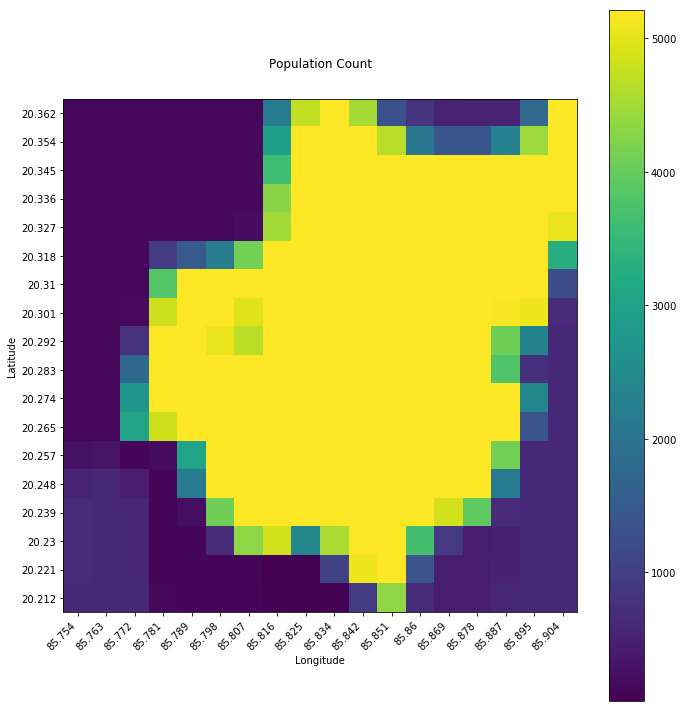

In [5]:
# And then you can use the plot() method to look at it
bhubaneswar.plot(title="Population Count")
plt.show()

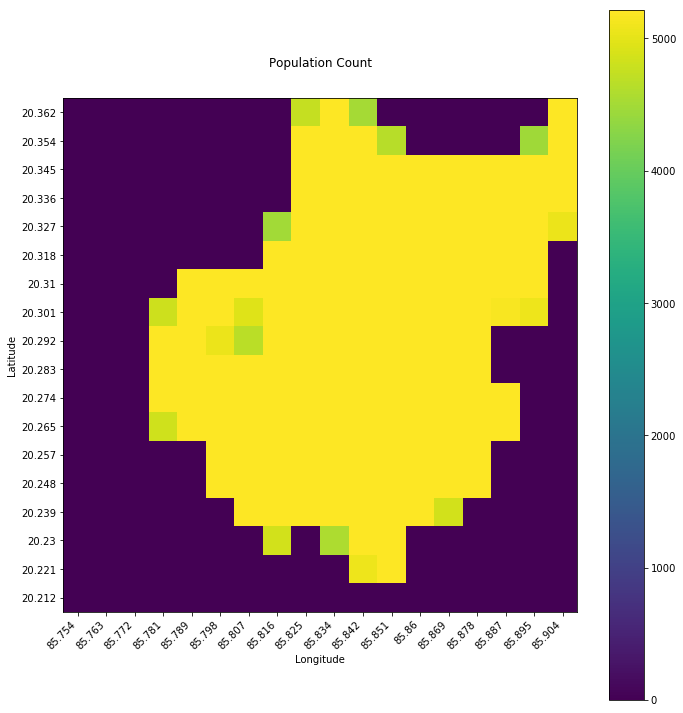

In [6]:
# You can filter off pixels with values below a given percentile for the region.
top_50 = bhubaneswar.filter_low_values(percentile=50)
top_50.plot(title="Population Count")
plt.show()

In [7]:
# Compare how many people were filtered off
print(bhubaneswar.pixel_array.sum())
print(top_50.pixel_array.sum())

978145.910583
837550.266113


In [8]:
# And compare the number of tiles zero'd out
print(bhubaneswar.pixel_array.size - np.count_nonzero(bhubaneswar.pixel_array))
print(top_50.pixel_array.size - np.count_nonzero(top_50.pixel_array))

0
162


In [9]:
# Let's find out which wholesale market each pixel is closest to.
wholesale_markets = [
    (20.25092, 85.78108),
    (20.17833, 85.11292),
    (20.18590, 85.62740),
    (20.13014, 85.47880),
    (20.17037, 85.70586),
    (20.22248, 85.97898),
]

In [10]:
# There is a method for matching pixels to a list of locations
closest_wholesales = bhubaneswar.match_to_closest_location(wholesale_markets)
print(closest_wholesales)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5]]


In [11]:
# We can then get the number of people covered by each location.
people_per_market = top_50.sum_by_labels(closest_wholesales)
for market_index, people_served in people_per_market.items():
    print("Wholesale market {} serves: {}".format(market_index, people_served))

Wholesale market 0 serves: 832486.4404296875
Wholesale market 5 serves: 5063.82568359375
